Importing Data 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import sqlite3 
import seaborn as sns


from glob import glob


In [4]:
cd~

C:\Users\laure


In [5]:

cd Flatiron\dsc-project-template\dsc-phase-1-project


C:\Users\laure\Flatiron\dsc-project-template\dsc-phase-1-project


In [6]:
pwd

'C:\\Users\\laure\\Flatiron\\dsc-project-template\\dsc-phase-1-project'

In [7]:
csv_files = glob("./zippedData/*.csv")
csv_files

['./zippedData\\bom.movie_gross.csv',
 './zippedData\\imdb.name.basics.csv',
 './zippedData\\imdb.title.akas.csv',
 './zippedData\\imdb.title.basics.csv',
 './zippedData\\imdb.title.crew.csv',
 './zippedData\\imdb.title.principals.csv',
 './zippedData\\imdb.title.ratings.csv',
 './zippedData\\tmdb.movies.csv',
 './zippedData\\tn.movie_budgets.csv']

In [8]:
csv_files[0]

'./zippedData\\bom.movie_gross.csv'

In [9]:
csv_read = {}

In [10]:
for file in csv_files:
    csv_read[file] = pd.read_csv(file)

In [11]:
type(csv_read)

dict

In [12]:
csv_read.keys()


dict_keys(['./zippedData\\bom.movie_gross.csv', './zippedData\\imdb.name.basics.csv', './zippedData\\imdb.title.akas.csv', './zippedData\\imdb.title.basics.csv', './zippedData\\imdb.title.crew.csv', './zippedData\\imdb.title.principals.csv', './zippedData\\imdb.title.ratings.csv', './zippedData\\tmdb.movies.csv', './zippedData\\tn.movie_budgets.csv'])

In [13]:
csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace('.csv','').replace('.','_')
    filename_df = pd.read_csv(filename,index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [14]:
csv_files_dict.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'imdb_title_ratings', 'tmdb_movies', 'tn_movie_budgets'])

## Cleaning Tables 

In [15]:
#Convert Object into Str
def convert_to_str(df, col):
    df[col] = df[col].astype('str')
    return df.info()

In [16]:
#Convert object to date YYYY-MM-DD
def convert_dates(df, col):
    df[col] = pd.to_datetime(df[col])
    return df.info()

In [17]:
#convert NaN and None and none to 0
def convert_0(df, col):
    df[col] = df[col].str.replace('NaN', 0).str.replace('None' , 0)\
    .str.replace('none' , 0).astype('int64')
    df=df[col].str.fillna(0, inplace = True).astype('int64')
    return df.sort_values(col)


In [18]:
def convert_to_int(df, col):
    df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('int64')
    return df.info()

In [19]:
def remove_rows(df, col, index):
    df = df.loc[df[col] != index]
#     inplace=True
    df.info()
    return df

In [20]:
def sort_values(df, col):
    df.sort_values(col)

### bom_movie_gross

bom_movie_gross

    - Need to change types to reflect what the data type is 
    

In [21]:
bom_movie_gross_df = csv_files_dict['bom_movie_gross']
bom_movie_gross_df.info()
bom_movie_gross_df.sort_values('foreign_gross')

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


,studio,domestic_gross,foreign_gross,year
title,,,,
The Fate of the Furious,Uni.,226000000.0,"1,010.0",2017
Jurassic World,Uni.,652300000.0,"1,019.4",2015
Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
Furious 7,Uni.,353000000.0,"1,163.0",2015
Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [22]:
#Convert object to int
convert_to_int(bom_movie_gross_df,'year')

AttributeError: Can only use .str accessor with string values!

In [34]:
#Convert object to int
convert_to_int(bom_movie_gross_df,'foreign_gross') 

<ipython-input-18-c29099b0b24b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('int64')


ValueError: cannot convert float NaN to integer

## name_basics

	-remove people with imput in death year
	 (will be used to get the name of people to match with other tables)


In [35]:
#Creating df for imdb_name_basics
imdb_name_basics_df = csv_files_dict['imdb_name_basics']
imdb_name_basics_df.info()
imdb_name_basics_df.sort_values('death_year')

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0653992,Ovid,NaN,17.0,writer,"tt3179572,tt0057818,tt0085182,tt3907210"
nm0613556,Shikibu Murasaki,973.0,1031.0,writer,"tt0092875,tt0043580,tt0094100,tt0256385"
nm0019604,Dante Alighieri,1265.0,1321.0,"writer,soundtrack","tt1874782,tt7370578,tt1598441,tt1118686"
nm0090504,Giovanni Boccaccio,1313.0,1375.0,writer,"tt0045675,tt0068832,tt0158510,tt5666304"
nm1063158,Cheng'en Wu,1506.0,1581.0,writer,"tt1163129,tt6168860,tt0112778,tt1753783"
...,...,...,...,...,...
nm9990381,Susan Grobes,NaN,NaN,actress,NaN
nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"


In [36]:
# #Remove rows where there is a death year
# def remove_rows(df, col, index):
#     df = df.loc[df[col] != index]
# #     inplace=True
#     df.info()
#     return df
    
# tn_movie_budgets_df = remove_rows(tn_movie_budgets_df, 'worldwide_gross'  , 0)
# tn_movie_budgets_df.sort_values('worldwide_gross')

## imdb_title_akas
	-Set original to 1 and get rid of the rest
    (use to get the name of movie in another cell )


In [37]:
#Creating df for imdb_title_akas
# imdb_title_akas_df = csv_files_dict['imdb_title_akas']
# imdb_title_akas_df.info()
imdb_title_akas_df.sort_values('ordering')

NameError: name 'imdb_title_akas_df' is not defined

In [38]:
def remove_rows(df, col, index):
    df = df.loc[df[col] != index]
#     inplace=True
    df.info()
    return df
    
# tn_movie_budgets_df = remove_rows(tn_movie_budgets_df, 'worldwide_gross'  , 0)
# tn_movie_budgets_df.sort_values('worldwide_gross')
imdb_title_akas_df = remove_rows(imdb_title_akas_df, 'is_original_title'  , 0.0)
imdb_title_akas_df.sort_values('is_original_title')

NameError: name 'imdb_title_akas_df' is not defined

## imdb_title_basics
	-remove years before 2010 
	-separate genres by comma


In [39]:
#Creating df for imdb_title_basics
imdb_title_basics_df = csv_files_dict['imdb_title_basics']
imdb_title_basics_df.info()
imdb_title_basics_df.sort_values('start_year')


<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,NaN,Comedy
tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61.0,Music
tt1634300,Role/Play,Role/Play,2010,85.0,"Drama,Romance"
tt1634332,Johan1,Johan Primero,2010,78.0,"Comedy,Drama,Romance"
tt1634334,Hands Up,Les mains en l'air,2010,90.0,Drama
...,...,...,...,...,...
tt10300396,Untitled Star Wars Film,Untitled Star Wars Film,2024,NaN,NaN
tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy"
tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,NaN,Fantasy


In [40]:
imdb_title_basics_df['movie']=imdb_title_basics_df['original_title']

In [41]:
def remove_rows_greater_than(df, col, index):
    df = df.loc[df[col] <= index]
#     inplace=True
    df.info()
    return df

imdb_title_basics_df = remove_rows_greater_than(imdb_title_basics_df, 'start_year', 2020)
imdb_title_basics_df.sort_values('start_year')

<class 'pandas.core.frame.DataFrame'>
Index: 146018 entries, tt0063540 to tt9916754
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146018 non-null  object 
 1   original_title   145997 non-null  object 
 2   start_year       146018 non-null  int64  
 3   runtime_minutes  114398 non-null  float64
 4   genres           140622 non-null  object 
 5   movie            145997 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.8+ MB


,primary_title,original_title,start_year,runtime_minutes,genres,movie
tconst,,,,,,
tt1579444,The Song Beneath the Song,To tragoudi kato apo to tragoudi,2010,89.0,Romance,To tragoudi kato apo to tragoudi
tt1543511,Mister Rogers & Me,Mister Rogers & Me,2010,79.0,Documentary,Mister Rogers & Me
tt1543566,New Year,New Year,2010,77.0,"Comedy,Drama,Romance",New Year
tt1543597,Off World,Off World,2010,76.0,Drama,Off World
tt1543609,The Sark Case,The Sark Case,2010,75.0,Documentary,The Sark Case
...,...,...,...,...,...,...
tt10328454,Untitled Danny Ramirez Horror,Untitled Danny Ramirez Horror,2020,NaN,Horror,Untitled Danny Ramirez Horror
tt6723592,Tenet,Tenet,2020,NaN,"Action,Drama,Thriller",Tenet
tt10426048,Romeo + Juliet,Romeo + Juliet,2020,NaN,"Drama,Romance,Thriller",Romeo + Juliet


## imdb_title_crew
	-remove information with in this table is repetitive  


In [42]:
#Creating df for imdb_title_crew
imdb_title_crew_df = csv_files_dict['imdb_title_crew']
imdb_title_crew_df.info()
imdb_title_crew_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


## imdb_title_basics
	-remove years before 2010 
	-separate genres by comma


In [43]:
#Creating df for imdb_title_principals
imdb_title_principals_df = csv_files_dict['imdb_title_principals']
imdb_title_principals_df.info()
imdb_title_principals_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [44]:
# imdb_title_principals_df['nco'] = df.index
# imdb_title_principals_df

In [45]:
#Add Column tconst1
# imdb_title_principals_df['tconst1']=imdb_title_principals_df[tconst]
# imdb_title_principals_df

In [46]:
# df3 = pd.merge(imdb_title_principals_df, imdb_title_ratings_df)
# df3

## imdb_title_ratings
	-get name from other table 


In [47]:
#Creating df for imdb_title_ratings
imdb_title_ratings_df = csv_files_dict['imdb_title_ratings']
imdb_title_ratings_df.info()
imdb_title_ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


## tmdb_movies
	-Table is fine 


In [48]:
#Creating df for bom_movie_gross
tmdb_movies_df = csv_files_dict['tmdb_movies']
tmdb_movies_df.info()
tmdb_movies_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## tn_movie_budgets
	-Remove all ($0 domestic gross AND $0 world wide)
	-Remove Movies before 2010
	-Change date to XXXX-MM-DD format
	-Create a domestic and world wide profit line 
	-Change money in to floats (will need to remove $)


In [49]:
#Creating df for tn_movie_budgets
tn_movie_budgets_df = csv_files_dict['tn_movie_budgets']
tn_movie_budgets_df.info()
tn_movie_budgets_df.sort_values('domestic_gross')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
82,"Oct 26, 2012",Mientras duermes,"$5,000,000",$0,"$9,109,597"
9,"Nov 4, 2005",Wal-Mart: The High Cost of Low Price,"$1,500,000",$0,"$58,692"
8,"Jul 20, 2018",Teefa in Trouble,"$1,500,000",$0,"$98,806"
7,"Oct 17, 2014",Housebound,"$1,500,000",$0,"$236,863"
58,"Dec 31, 2008",Bathory,"$15,000,000",$0,"$3,436,763"
...,...,...,...,...,...
8,"Jun 13, 1997",Hercules,"$70,000,000","$99,112,101","$250,700,000"
74,"Jun 4, 1999",Desert Blue,"$5,000,000","$99,147","$99,147"
43,"Aug 3, 2018",Christopher Robin,"$75,000,000","$99,215,042","$197,504,758"


In [50]:
convert_to_int(tn_movie_budgets_df, 'production_budget')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(4)
memory usage: 271.0+ KB


<ipython-input-18-c29099b0b24b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('int64')


In [51]:
convert_to_int(tn_movie_budgets_df, 'domestic_gross')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(3)
memory usage: 271.0+ KB


<ipython-input-18-c29099b0b24b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('int64')


In [52]:
convert_to_int(tn_movie_budgets_df, 'worldwide_gross')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


<ipython-input-18-c29099b0b24b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[col] = df[col].str.replace('$', '').str.replace(',', '').astype('int64')


In [53]:
def remove_rows_less_than(df, col, index):
    df = df.loc[df[col] >= index]
#     inplace=True
    df.info()
    return df

In [54]:
convert_to_str(tn_movie_budgets_df, 'movie')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [55]:
convert_dates(tn_movie_budgets_df, 'release_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


In [56]:
tn_movie_budgets_df = remove_rows_greater_than(tn_movie_budgets_df, 'release_date', '2020-12-01')
tn_movie_budgets_df.sort_values('release_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5780 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5780 non-null   datetime64[ns]
 1   movie              5780 non-null   object        
 2   production_budget  5780 non-null   int64         
 3   domestic_gross     5780 non-null   int64         
 4   worldwide_gross    5780 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 270.9+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,1915-02-08,The Birth of a Nation,110000,10000000,11000000
24,1916-09-05,Intolerance,385907,0,0
15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
7,1925-11-19,The Big Parade,245000,11000000,22000000
...,...,...,...,...,...
13,2019-12-31,Rogue City,13000000,0,0
16,2019-12-31,Eli,11000000,0,0
30,2019-12-31,Reagan,25000000,0,0


In [57]:
tn_movie_budgets_df = remove_rows_less_than(tn_movie_budgets_df, 'release_date', '2010-01-01')
tn_movie_budgets_df.sort_values('production_budget')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 2 to 81
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2192 non-null   datetime64[ns]
 1   movie              2192 non-null   object        
 2   production_budget  2192 non-null   int64         
 3   domestic_gross     2192 non-null   int64         
 4   worldwide_gross    2192 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 102.8+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
81,2015-09-29,A Plague So Pleasant,1400,0,0
78,2018-12-31,Red 11,7000,0,0
73,2012-01-13,Newlyweds,9000,4584,4584
72,2015-05-19,Family Motocross,10000,0,0
61,2010-04-02,Breaking Upwards,15000,115592,115592
...,...,...,...,...,...
6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963


In [58]:
def remove_rows(df, col, index):
    df = df.loc[df[col] != index]
#     inplace=True
    df.info()
    return df
    
tn_movie_budgets_df = remove_rows(tn_movie_budgets_df, 'worldwide_gross'  , 0)
tn_movie_budgets_df.sort_values('worldwide_gross')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 2 to 73
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1922 non-null   datetime64[ns]
 1   movie              1922 non-null   object        
 2   production_budget  1922 non-null   int64         
 3   domestic_gross     1922 non-null   int64         
 4   worldwide_gross    1922 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 90.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
3,2015-12-11,American Hero,1000000,0,26
36,2014-11-21,Food Chains,913000,0,176
84,2014-12-31,Destiny,750000,0,450
67,2018-05-11,Higher Power,500000,528,528
82,2010-05-21,Perrierâs Bounty,6600000,828,828
...,...,...,...,...,...
27,2012-05-04,The Avengers,225000000,623279547,1517935897
67,2015-04-03,Furious 7,190000000,353007020,1518722794
34,2015-06-12,Jurassic World,215000000,652270625,1648854864


In [59]:
def remove_rows_between(df, col, index, index2):
    df = df.loc[df[col] >= index] 
    df = df.loc[df[col] <= index2]
#     inplace=True
    df.info()
    return df

tn_movie_budgets_df = remove_rows_between(tn_movie_budgets_df, 'release_date'  , '2010-01-01' , '2021-01-01')
tn_movie_budgets_df.sort_values('release_date')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922 entries, 2 to 73
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1922 non-null   datetime64[ns]
 1   movie              1922 non-null   object        
 2   production_budget  1922 non-null   int64         
 3   domestic_gross     1922 non-null   int64         
 4   worldwide_gross    1922 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 90.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
13,2010-01-08,Youth in Revolt,18000000,15285588,19685588
40,2010-01-08,Leap Year,19000000,25918920,32618920
67,2010-01-08,Daybreakers,20000000,30101577,51445503
36,2010-01-15,Fish Tank,3000000,374675,5922292
25,2010-01-15,The Last Station,18000000,6617867,15696146
...,...,...,...,...,...
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496
98,2019-06-14,Shaft,30000000,600000,600000


In [60]:
tn_movie_budgets_df['domestic_gross_profit'] = (0 - tn_movie_budgets_df['production_budget']) + tn_movie_budgets_df['domestic_gross']
tn_movie_budgets_df.sort_values('release_date')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit
id,,,,,,
13,2010-01-08,Youth in Revolt,18000000,15285588,19685588,-2714412
40,2010-01-08,Leap Year,19000000,25918920,32618920,6918920
67,2010-01-08,Daybreakers,20000000,30101577,51445503,10101577
36,2010-01-15,Fish Tank,3000000,374675,5922292,-2625325
25,2010-01-15,The Last Station,18000000,6617867,15696146,-11382133
...,...,...,...,...,...,...
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650
81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,-16204345
98,2019-06-14,Shaft,30000000,600000,600000,-29400000


In [61]:
tn_movie_budgets_df['worldwide_gross_profit'] = (0 - tn_movie_budgets_df['production_budget']) + tn_movie_budgets_df['worldwide_gross']
tn_movie_budgets_df.sort_values('release_date')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit
id,,,,,,,
13,2010-01-08,Youth in Revolt,18000000,15285588,19685588,-2714412,1685588
40,2010-01-08,Leap Year,19000000,25918920,32618920,6918920,13618920
67,2010-01-08,Daybreakers,20000000,30101577,51445503,10101577,31445503
36,2010-01-15,Fish Tank,3000000,374675,5922292,-2625325,2922292
25,2010-01-15,The Last Station,18000000,6617867,15696146,-11382133,-2303854
...,...,...,...,...,...,...,...
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650
81,2019-06-07,The Secret Life of Pets 2,80000000,63795655,113351496,-16204345,33351496
98,2019-06-14,Shaft,30000000,600000,600000,-29400000,-29400000


In [62]:
tn_movie_budgets_df['domestic_roi_percent'] = round(tn_movie_budgets_df['domestic_gross'] /\
                                                    tn_movie_budgets_df['production_budget'], 0)
tn_movie_budgets_df.sort_values('domestic_roi_percent')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent
id,,,,,,,,
39,2017-09-29,"Don Gato, el inicio de la pandilla",8000000,0,4604656,-8000000,-3395344,0.0
32,2016-07-13,The Infiltrator,47500000,15436808,20718104,-32063192,-26781896,0.0
12,2016-05-06,Dheepan,9000000,248795,7704357,-8751205,-1295643,0.0
40,2010-06-18,Jonah Hex,47000000,10547117,11022696,-36452883,-35977304,0.0
42,2016-12-23,Silence,46500000,7100177,23726626,-39399823,-22773374,0.0
...,...,...,...,...,...,...,...,...
49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,35.0
63,2011-04-01,Insidious,1500000,54009150,99870886,52509150,98370886,36.0
90,2014-03-21,Godâs Not Dead,1150000,60755732,63777092,59605732,62627092,53.0


In [63]:
#Remove max from tn_movie_budgets_df
tn_movie_budgets_df = tn_movie_budgets_df.loc[tn_movie_budgets_df['domestic_roi_percent']!=tn_movie_budgets_df\
                                              ['domestic_roi_percent'].max()]
tn_movie_budgets_df.info()
tn_movie_budgets_df.sort_values('domestic_roi_percent')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 2 to 73
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            1921 non-null   datetime64[ns]
 1   movie                   1921 non-null   object        
 2   production_budget       1921 non-null   int64         
 3   domestic_gross          1921 non-null   int64         
 4   worldwide_gross         1921 non-null   int64         
 5   domestic_gross_profit   1921 non-null   int64         
 6   worldwide_gross_profit  1921 non-null   int64         
 7   domestic_roi_percent    1921 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 135.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent
id,,,,,,,,
39,2017-09-29,"Don Gato, el inicio de la pandilla",8000000,0,4604656,-8000000,-3395344,0.0
32,2016-07-13,The Infiltrator,47500000,15436808,20718104,-32063192,-26781896,0.0
12,2016-05-06,Dheepan,9000000,248795,7704357,-8751205,-1295643,0.0
40,2010-06-18,Jonah Hex,47000000,10547117,11022696,-36452883,-35977304,0.0
42,2016-12-23,Silence,46500000,7100177,23726626,-39399823,-22773374,0.0
...,...,...,...,...,...,...,...,...
14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,63364198,33.0
49,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,35.0
63,2011-04-01,Insidious,1500000,54009150,99870886,52509150,98370886,36.0


In [64]:
#Remove max from tn_movie_budgets_df
tn_movie_budgets_df = tn_movie_budgets_df.loc[tn_movie_budgets_df['domestic_gross_profit']!=tn_movie_budgets_df\
                                              ['domestic_gross_profit'].max()]
tn_movie_budgets_df.info()
tn_movie_budgets_df.sort_values('domestic_gross_profit')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 2 to 73
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            1920 non-null   datetime64[ns]
 1   movie                   1920 non-null   object        
 2   production_budget       1920 non-null   int64         
 3   domestic_gross          1920 non-null   int64         
 4   worldwide_gross         1920 non-null   int64         
 5   domestic_gross_profit   1920 non-null   int64         
 6   worldwide_gross_profit  1920 non-null   int64         
 7   domestic_roi_percent    1920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 135.0+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent
id,,,,,,,,
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,0.0
14,2012-03-09,John Carter,275000000,73058679,282778100,-201941321,7778100,0.0
13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,-185697885,-14997885,0.0
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,1.0
32,2012-05-18,Battleship,220000000,65233400,313477717,-154766600,93477717,0.0
...,...,...,...,...,...,...,...,...
7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,2.0
27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897,3.0
44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,408581744,1042520711,3.0


In [65]:
tn_movie_budgets_df['worldwide_roi_percent'] = round(tn_movie_budgets_df['worldwide_gross'] / \
                                                tn_movie_budgets_df['production_budget'],0)
tn_movie_budgets_df.sort_values('worldwide_roi_percent')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
id,,,,,,,,,
21,2015-01-20,Veronika Decides to Die,9000000,0,2243,-9000000,-8997757,0.0,0.0
49,2010-04-30,Gunless,9900000,458054,458054,-9441946,-9441946,0.0,0.0
5,2015-10-02,Shanghai,50000000,46425,15505922,-49953575,-34494078,0.0,0.0
2,2015-04-17,Child 44,50000000,1224330,8004221,-48775670,-41995779,0.0,0.0
81,2016-06-24,Free State of Jones,50000000,20810036,23237252,-29189964,-26762748,0.0,0.0
...,...,...,...,...,...,...,...,...,...
50,2017-01-20,Split,5000000,138141585,278964806,133141585,273964806,28.0,56.0
65,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,81752907,174512032,28.0,59.0
14,2015-04-17,Unfriended,1000000,32789645,64364198,31789645,63364198,33.0,64.0


## TOP 100 Moives 
    
    We will be evaulating the top 100 movies bases on 

In [66]:
def IQR(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    df = df.loc[filter]  
    
    return df

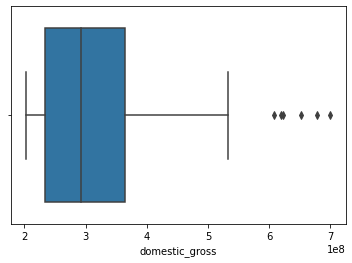

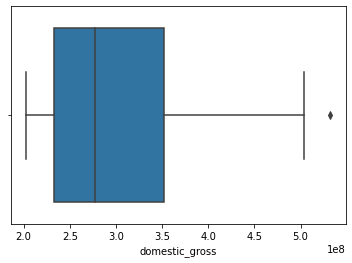

In [67]:
top100_gd = tn_movie_budgets_df.sort_values('domestic_gross').tail(100)

sns.boxplot(x=top100_gd['domestic_gross'])
plt.show()

top100_gd = IQR(top100_gd, 'domestic_gross')

sns.boxplot(x=top100_gd['domestic_gross'])
plt.show()

In [68]:
top100_wg = tn_movie_budgets_df.sort_values('worldwide_gross').tail(100)
top100_wg = IQR(top100_wg, 'worldwide_gross')

In [69]:
top100_dgp = tn_movie_budgets_df.sort_values('domestic_gross_profit').tail(100)
top100_dgp = IQR(top100_dgp, 'domestic_gross_profit')

In [70]:
top100_wgp = tn_movie_budgets_df.sort_values('worldwide_gross_profit').tail(100)
top100_wgp = IQR(top100_wgp, 'worldwide_gross_profit')

In [71]:
top100_drp = tn_movie_budgets_df.sort_values('domestic_roi_percent').tail(100)
top100_drp = IQR(top100_drp, 'domestic_roi_percent')

In [72]:
top100_wrp = tn_movie_budgets_df.sort_values('worldwide_roi_percent').tail(100)
top100_wrp = IQR(top100_wrp, 'worldwide_roi_percent')

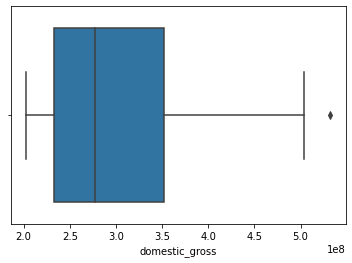

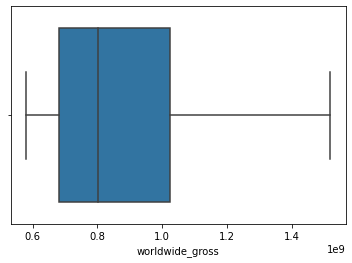

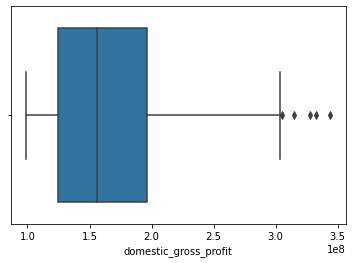

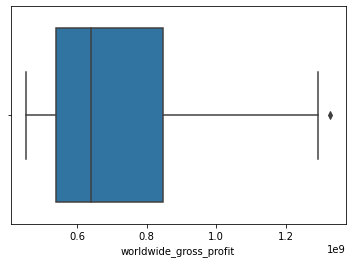

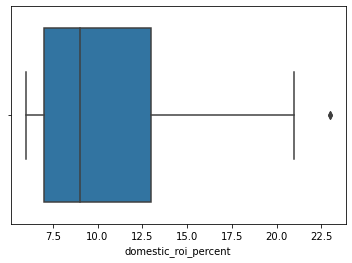

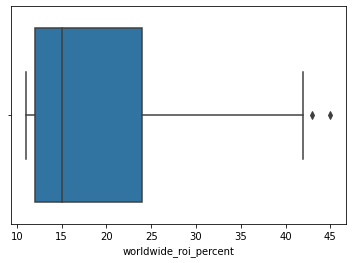

In [73]:
sns.boxplot(x=top100_gd['domestic_gross'])
plt.show()
sns.boxplot(x=top100_wg['worldwide_gross'])
plt.show()
sns.boxplot(x=top100_dgp['domestic_gross_profit'])
plt.show()
sns.boxplot(x=top100_wgp['worldwide_gross_profit'])
plt.show()
sns.boxplot(x=top100_drp['domestic_roi_percent'])
plt.show()
sns.boxplot(x=top100_wrp['worldwide_roi_percent'])
plt.show()

In [74]:
#mean of top 100 

## Genere

In [75]:
top_150 = tn_movie_budgets_df.sort_values('domestic_roi_percent').tail(150)
top_150['year'] = pd.DatetimeIndex(top_150['release_date']).year

In [76]:
movie_details_df = pd.merge(top_150, imdb_title_basics_df, left_on = ['movie'], right_on= ['primary_title'], how = 'left')

In [77]:
movie_details_df.dropna(inplace=True)

In [78]:
movie_details_df2 = pd.merge(top_150, imdb_title_basics_df, left_on= ['movie', 'year'], 
                right_on = ['primary_title', 'start_year'], how = 'left')

In [79]:
movie_details_df2.shape

(152, 16)

In [80]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            152 non-null    datetime64[ns]
 1   movie_x                 152 non-null    object        
 2   production_budget       152 non-null    int64         
 3   domestic_gross          152 non-null    int64         
 4   worldwide_gross         152 non-null    int64         
 5   domestic_gross_profit   152 non-null    int64         
 6   worldwide_gross_profit  152 non-null    int64         
 7   domestic_roi_percent    152 non-null    float64       
 8   worldwide_roi_percent   152 non-null    float64       
 9   year                    152 non-null    int64         
 10  primary_title           117 non-null    object        
 11  original_title          117 non-null    object        
 12  start_year              117 non-null    float64   

In [81]:
movie_details_df2.dropna(inplace=True)
movie_details_df2

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,primary_title,original_title,start_year,runtime_minutes,genres,movie_y
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2016.0,97.0,"Horror,Mystery,Thriller",The Boy
1,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,Jigsaw,Jigsaw,2017.0,92.0,"Crime,Horror,Mystery",Jigsaw
2,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,"Love, Simon","Love, Simon",2018.0,110.0,"Comedy,Drama,Romance","Love, Simon"
3,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,About Last Night,About Last Night,2014.0,100.0,"Comedy,Romance",About Last Night
4,2014-08-22,If I Stay,11000000,50474843,78356170,39474843,67356170,5.0,7.0,2014,If I Stay,If I Stay,2014.0,107.0,"Drama,Fantasy,Music",If I Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2010-08-27,The Last Exorcism,1800000,41034350,70165900,39234350,68365900,23.0,39.0,2010,The Last Exorcism,The Last Exorcism,2010.0,87.0,"Drama,Horror,Thriller",The Last Exorcism
144,2015-08-28,War Room,3000000,67790117,73975239,64790117,70975239,23.0,25.0,2015,War Room,War Room,2015.0,120.0,Drama,War Room
145,2010-10-20,Paranormal Activity 2,3000000,84752907,177512032,81752907,174512032,28.0,59.0,2010,Paranormal Activity 2,Paranormal Activity 2,2010.0,91.0,Horror,Paranormal Activity 2
148,2017-02-24,Get Out,5000000,176040665,255367951,171040665,250367951,35.0,51.0,2017,Get Out,Get Out,2017.0,104.0,"Horror,Mystery,Thriller",Get Out


In [82]:
movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(',') if x else x)
movie_details_df.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,primary_title,original_title,start_year,runtime_minutes,genres,movie_y
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2015.0,105.0,"[Drama, Horror, Thriller]",The Boy
1,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2016.0,97.0,"[Horror, Mystery, Thriller]",The Boy
2,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,Jigsaw,Jigsaw,2017.0,92.0,"[Crime, Horror, Mystery]",Jigsaw
3,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,"Love, Simon","Love, Simon",2018.0,110.0,"[Comedy, Drama, Romance]","Love, Simon"
4,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,About Last Night,About Last Night,2014.0,100.0,"[Comedy, Romance]",About Last Night


In [83]:
movie_details_df2['genres'] = movie_details_df2['genres'].apply(lambda x: x.split(',') if x else x)
movie_details_df.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,primary_title,original_title,start_year,runtime_minutes,genres,movie_y
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2015.0,105.0,"[Drama, Horror, Thriller]",The Boy
1,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,The Boy,The Boy,2016.0,97.0,"[Horror, Mystery, Thriller]",The Boy
2,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,Jigsaw,Jigsaw,2017.0,92.0,"[Crime, Horror, Mystery]",Jigsaw
3,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,"Love, Simon","Love, Simon",2018.0,110.0,"[Comedy, Drama, Romance]","Love, Simon"
4,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,About Last Night,About Last Night,2014.0,100.0,"[Comedy, Romance]",About Last Night


In [84]:
movie_details_df2['genres'] = movie_details_df2['genres'].astype(str)
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 150
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            117 non-null    datetime64[ns]
 1   movie_x                 117 non-null    object        
 2   production_budget       117 non-null    int64         
 3   domestic_gross          117 non-null    int64         
 4   worldwide_gross         117 non-null    int64         
 5   domestic_gross_profit   117 non-null    int64         
 6   worldwide_gross_profit  117 non-null    int64         
 7   domestic_roi_percent    117 non-null    float64       
 8   worldwide_roi_percent   117 non-null    float64       
 9   year                    117 non-null    int64         
 10  primary_title           117 non-null    object        
 11  original_title          117 non-null    object        
 12  start_year              117 non-null    float64   

In [85]:
#movie_details_df['genres'] = movie_details_df['genres'].astype(str)

In [86]:
all_genres = set()
for genres in movie_details_df['genres']:
    if genres:
        all_genres.update(genres)

In [87]:
all_genres


{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Western'}

In [88]:
movie_details_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 150
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   release_date            117 non-null    datetime64[ns]
 1   movie_x                 117 non-null    object        
 2   production_budget       117 non-null    int64         
 3   domestic_gross          117 non-null    int64         
 4   worldwide_gross         117 non-null    int64         
 5   domestic_gross_profit   117 non-null    int64         
 6   worldwide_gross_profit  117 non-null    int64         
 7   domestic_roi_percent    117 non-null    float64       
 8   worldwide_roi_percent   117 non-null    float64       
 9   year                    117 non-null    int64         
 10  primary_title           117 non-null    object        
 11  original_title          117 non-null    object        
 12  start_year              117 non-null    float64   

In [89]:
for genre in all_genres:
    movie_details_df2[genre] = np.zeros(shape=movie_details_df2.shape[0])
    
movie_details_df2.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,...,Comedy,Western,Sci-Fi,Fantasy,Crime,Drama,History,Horror,Animation,Mystery
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-08-22,If I Stay,11000000,50474843,78356170,39474843,67356170,5.0,7.0,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
for index, row in movie_details_df2.iterrows():
    if row['genres']:
        for genre in row['genres']:
            movie_details_df2.loc[index,genre] = 1
            
movie_details_df2.head()

,release_date,movie_x,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year,...,F,u,A,v,S,-,B,g,p,W
0,2016-01-22,The Boy,10000000,35819556,68220952,25819556,58220952,4.0,7.0,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-27,Jigsaw,10000000,38052832,102445196,28052832,92445196,4.0,10.0,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-03-16,"Love, Simon",10000000,40826341,65520633,30826341,55520633,4.0,7.0,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-02-14,About Last Night,13000000,48637684,50445860,35637684,37445860,4.0,4.0,2014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-08-22,If I Stay,11000000,50474843,78356170,39474843,67356170,5.0,7.0,2014,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
movie_details_df_modified = movie_details_df.drop(columns = 'genres')

In [92]:
for col in movie_details_df_modified:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{movie_details_df_modified[col].value_counts()}')

Viewing values in col: release_date
Top 5 values:
2015-08-07    9
2018-04-13    6
2013-01-18    6
2017-01-20    5
2015-09-11    4
             ..
2018-07-20    1
2013-07-12    1
2012-05-25    1
2015-06-19    1
2014-11-28    1
Name: release_date, Length: 130, dtype: int64
Viewing values in col: movie_x
Top 5 values:
The Gift                        9
Mama                            6
Truth or Dare                   6
Split                           5
The Visit                       4
                               ..
The Fighter                     1
Insidious: The Last Key         1
You're Next                     1
Hardcore Henry                  1
The Strangers: Prey at Night    1
Name: movie_x, Length: 134, dtype: int64
Viewing values in col: production_budget
Top 5 values:
5000000     36
20000000    12
10000000    11
1000000     11
3500000     10
15000000     8
12000000     6
2000000      5
13000000     5
3000000      4
7000000      4
18000000     4
25000000     4
1500000      4
400

In [93]:
cols = list(movie_details_df2.columns)

In [94]:
genre_cols = cols[11:]

In [95]:
genre_count = {}
for col in genre_cols:
    count = np.sum(movie_details_df2[col] == 1).sum()
    genre_count[col] = count

In [96]:
genre_count

{'original_title': 0,
 'start_year': 0,
 'runtime_minutes': 0,
 'genres': 0,
 'movie_y': 0,
 'Family': 0,
 'Romance': 0,
 'Adventure': 0,
 'Music': 0,
 'Documentary': 0,
 'Thriller': 0,
 'Sport': 0,
 'Action': 0,
 'Biography': 0,
 'Comedy': 0,
 'Western': 0,
 'Sci-Fi': 0,
 'Fantasy': 0,
 'Crime': 0,
 'Drama': 0,
 'History': 0,
 'Horror': 0,
 'Animation': 0,
 'Mystery': 0,
 '[': 117,
 "'": 117,
 'H': 40,
 'o': 101,
 'r': 106,
 ',': 102,
 ' ': 102,
 'M': 29,
 'y': 79,
 's': 37,
 't': 53,
 'e': 93,
 'T': 30,
 'h': 40,
 'i': 67,
 'l': 33,
 ']': 117,
 'C': 44,
 'm': 86,
 'd': 44,
 'D': 65,
 'a': 76,
 'R': 23,
 'n': 49,
 'c': 49,
 'F': 19,
 'u': 20,
 'A': 17,
 'v': 9,
 'S': 12,
 '-': 11,
 'B': 11,
 'g': 11,
 'p': 11,
 'W': 1}

## Is the overseas market worth it? 

In [97]:
df3 = pd.merge(imdb_title_basics_df,tn_movie_budgets_df)
df3

,primary_title,original_title,start_year,runtime_minutes,genres,movie,release_date,production_budget,domestic_gross,worldwide_gross,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",Foodfight!,2012-12-31,45000000,0,73706,-45000000,-44926294,0.0,0.0
1,The Overnight,The Overnight,2010,88.0,NaN,The Overnight,2015-06-19,200000,1109808,1165996,909808,965996,6.0,6.0
2,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",The Overnight,2015-06-19,200000,1109808,1165996,909808,965996,6.0,6.0
3,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,2013-03-22,25000000,720828,9313302,-24279172,-15686698,0.0,0.0
4,On the Road,On the Road,2011,90.0,Drama,On the Road,2013-03-22,25000000,720828,9313302,-24279172,-15686698,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,Chloe,Chloe,2017,6.0,"Documentary,Family",Chloe,2010-03-26,13000000,3075255,11831131,-9924745,-1168869,0.0,1.0
2220,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",Happy Death Day 2U,2019-02-13,9000000,28051045,64179495,19051045,55179495,3.0,7.0
2221,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,Fahrenheit 11/9,2018-09-21,5000000,6352306,6653715,1352306,1653715,1.0,1.0
2222,The Witch,The Witch,2018,NaN,Horror,The Witch,2016-02-19,3500000,25138705,40454520,21638705,36954520,7.0,12.0


In [98]:
del df3['primary_title']
del df3['original_title']

del df3['domestic_gross']
del df3['worldwide_gross']
del df3['domestic_gross']
df3

KeyError: 'domestic_gross'

In [99]:
df3

,start_year,runtime_minutes,genres,movie,release_date,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
0,2012,91.0,"Action,Animation,Comedy",Foodfight!,2012-12-31,45000000,-45000000,-44926294,0.0,0.0
1,2010,88.0,NaN,The Overnight,2015-06-19,200000,909808,965996,6.0,6.0
2,2015,79.0,"Comedy,Mystery",The Overnight,2015-06-19,200000,909808,965996,6.0,6.0
3,2012,124.0,"Adventure,Drama,Romance",On the Road,2013-03-22,25000000,-24279172,-15686698,0.0,0.0
4,2011,90.0,Drama,On the Road,2013-03-22,25000000,-24279172,-15686698,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2219,2017,6.0,"Documentary,Family",Chloe,2010-03-26,13000000,-9924745,-1168869,0.0,1.0
2220,2019,100.0,"Drama,Horror,Mystery",Happy Death Day 2U,2019-02-13,9000000,19051045,55179495,3.0,7.0
2221,2018,128.0,Documentary,Fahrenheit 11/9,2018-09-21,5000000,1352306,1653715,1.0,1.0
2222,2018,NaN,Horror,The Witch,2016-02-19,3500000,21638705,36954520,7.0,12.0


In [100]:
df4 = df3.sort_values('worldwide_roi_percent')

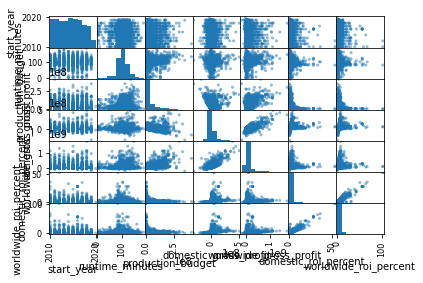

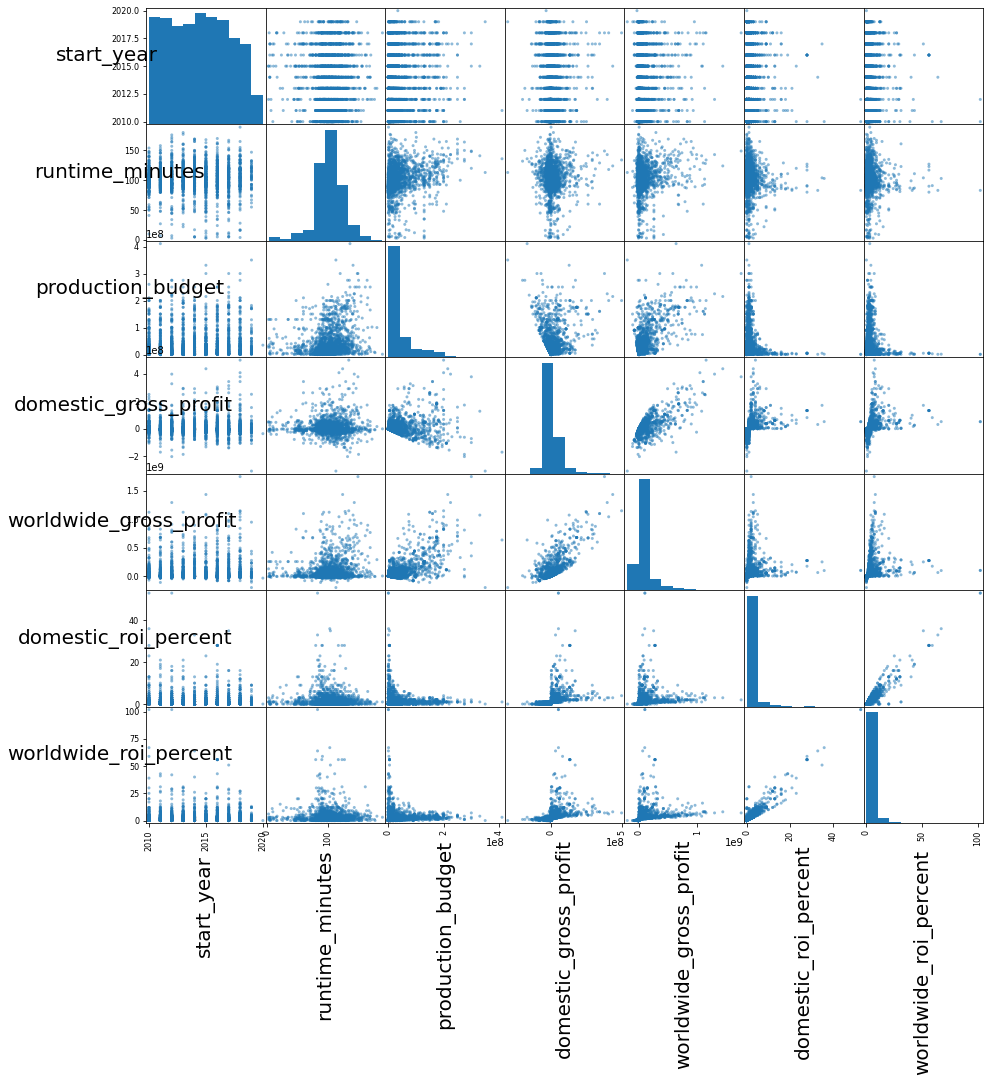

In [101]:
pd.plotting.scatter_matrix(df4)
scatter_matrix = pd.plotting.scatter_matrix(
    df4,
    figsize  = [15, 15]#,
#     marker   = ".",
#     s        = 0.2,
#     diagonal = "kde"
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)

In [102]:
df5 = df4.groupby(['start_year']).mean()
df5['runtime_minutes']=round(df5['runtime_minutes'],0)

df5


,runtime_minutes,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,
2010,102.0,3.575972e+07,8.712087e+06,6.812783e+07,1.984375,3.871094
2011,102.0,3.833374e+07,6.379640e+06,7.278201e+07,1.661417,3.342520
2012,101.0,4.110708e+07,8.806601e+06,8.225039e+07,1.796610,3.669492
2013,104.0,4.076439e+07,6.349458e+06,7.435123e+07,1.562500,3.312500
2014,103.0,3.783038e+07,1.111810e+07,8.430037e+07,1.400000,3.135849
2015,100.0,3.377672e+07,7.842309e+06,6.757454e+07,1.408560,3.007782
2016,103.0,4.042475e+07,1.376277e+07,9.020499e+07,2.313253,4.690763
2017,99.0,4.956400e+07,8.153353e+06,1.027877e+08,1.854369,3.665049
2018,105.0,4.550791e+07,2.081341e+07,1.178528e+08,1.958115,3.884817


In [103]:
df6 = df4.tail(150).groupby(['start_year']).mean()
df6['runtime_minutes']=round(df5['runtime_minutes'],0)

df6

,runtime_minutes,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,
2010,102.0,4.888203e+06,4.545366e+07,8.973059e+07,14.333333,26.722222
2011,102.0,4.773761e+06,3.131452e+07,6.702038e+07,10.928571,20.142857
2012,101.0,1.066429e+07,6.711874e+07,1.469208e+08,12.928571,25.428571
2013,104.0,1.077857e+07,6.105148e+07,1.662304e+08,9.857143,20.071429
2014,103.0,8.207510e+06,4.637868e+07,1.274688e+08,7.666667,20.200000
2015,100.0,1.432500e+07,6.924406e+07,1.942693e+08,7.071429,15.714286
2016,103.0,1.539783e+07,1.019099e+08,2.623697e+08,13.782609,28.478261
2017,99.0,2.000667e+07,1.034813e+08,2.742567e+08,10.400000,19.000000
2018,105.0,1.066944e+07,6.482940e+07,1.616568e+08,8.055556,16.111111


In [104]:
df5 = df4.groupby(['start_year']).mean()
df5['domestic_roi_percent']=round(df5['domestic_roi_percent'],0)
df5['worldwide_roi_percent']=round(df5['worldwide_roi_percent'],0)

df5

,runtime_minutes,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,
2010,101.528926,3.575972e+07,8.712087e+06,6.812783e+07,2.0,4.0
2011,101.950617,3.833374e+07,6.379640e+06,7.278201e+07,2.0,3.0
2012,101.479452,4.110708e+07,8.806601e+06,8.225039e+07,2.0,4.0
2013,104.379913,4.076439e+07,6.349458e+06,7.435123e+07,2.0,3.0
2014,102.791165,3.783038e+07,1.111810e+07,8.430037e+07,1.0,3.0
2015,100.165323,3.377672e+07,7.842309e+06,6.757454e+07,1.0,3.0
2016,103.296137,4.042475e+07,1.376277e+07,9.020499e+07,2.0,5.0
2017,99.243094,4.956400e+07,8.153353e+06,1.027877e+08,2.0,4.0
2018,104.530488,4.550791e+07,2.081341e+07,1.178528e+08,2.0,4.0


In [105]:
df6 = df4.tail(150).groupby(['start_year']).mean()
df6['domestic_roi_percent']=round(df6['domestic_roi_percent'],0)
df6['worldwide_roi_percent']=round(df6['worldwide_roi_percent'],0)

df6

,runtime_minutes,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent
start_year,,,,,,
2010,93.928571,4.888203e+06,4.545366e+07,8.973059e+07,14.0,27.0
2011,96.923077,4.773761e+06,3.131452e+07,6.702038e+07,11.0,20.0
2012,93.750000,1.066429e+07,6.711874e+07,1.469208e+08,13.0,25.0
2013,82.833333,1.077857e+07,6.105148e+07,1.662304e+08,10.0,20.0
2014,102.357143,8.207510e+06,4.637868e+07,1.274688e+08,8.0,20.0
2015,96.923077,1.432500e+07,6.924406e+07,1.942693e+08,7.0,16.0
2016,94.136364,1.539783e+07,1.019099e+08,2.623697e+08,14.0,28.0
2017,100.846154,2.000667e+07,1.034813e+08,2.742567e+08,10.0,19.0
2018,102.875000,1.066944e+07,6.482940e+07,1.616568e+08,8.0,16.0


In [106]:
df5['year']= ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
df5

,runtime_minutes,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year
start_year,,,,,,,
2010,101.528926,3.575972e+07,8.712087e+06,6.812783e+07,2.0,4.0,2010
2011,101.950617,3.833374e+07,6.379640e+06,7.278201e+07,2.0,3.0,2011
2012,101.479452,4.110708e+07,8.806601e+06,8.225039e+07,2.0,4.0,2012
2013,104.379913,4.076439e+07,6.349458e+06,7.435123e+07,2.0,3.0,2013
2014,102.791165,3.783038e+07,1.111810e+07,8.430037e+07,1.0,3.0,2014
2015,100.165323,3.377672e+07,7.842309e+06,6.757454e+07,1.0,3.0,2015
2016,103.296137,4.042475e+07,1.376277e+07,9.020499e+07,2.0,5.0,2016
2017,99.243094,4.956400e+07,8.153353e+06,1.027877e+08,2.0,4.0,2017
2018,104.530488,4.550791e+07,2.081341e+07,1.178528e+08,2.0,4.0,2018


In [107]:
df6['year']= ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
df6

,runtime_minutes,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year
start_year,,,,,,,
2010,93.928571,4.888203e+06,4.545366e+07,8.973059e+07,14.0,27.0,2010
2011,96.923077,4.773761e+06,3.131452e+07,6.702038e+07,11.0,20.0,2011
2012,93.750000,1.066429e+07,6.711874e+07,1.469208e+08,13.0,25.0,2012
2013,82.833333,1.077857e+07,6.105148e+07,1.662304e+08,10.0,20.0,2013
2014,102.357143,8.207510e+06,4.637868e+07,1.274688e+08,8.0,20.0,2014
2015,96.923077,1.432500e+07,6.924406e+07,1.942693e+08,7.0,16.0,2015
2016,94.136364,1.539783e+07,1.019099e+08,2.623697e+08,14.0,28.0,2016
2017,100.846154,2.000667e+07,1.034813e+08,2.742567e+08,10.0,19.0,2017
2018,102.875000,1.066944e+07,6.482940e+07,1.616568e+08,8.0,16.0,2018


Text(0, 0.5, 'ROI (percent)')

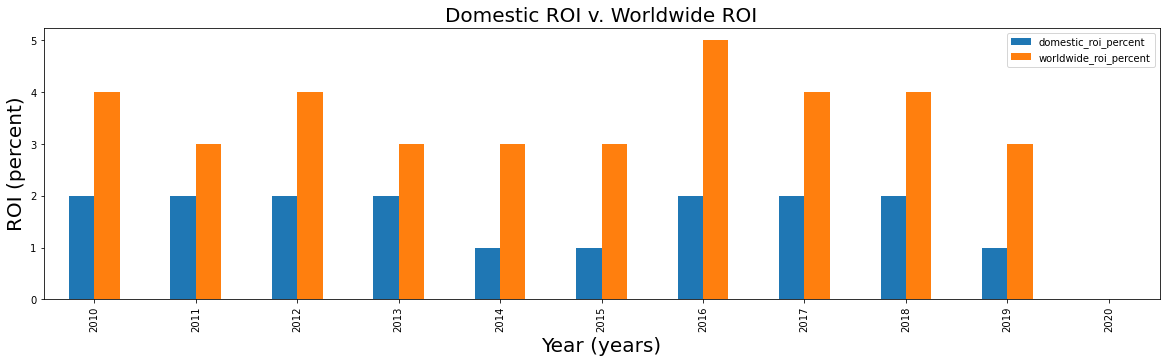

In [108]:
#df5[[df5['year'], "domestic_roi_percent", "worldwide_roi_percent"]].plot(x=df5['year'], kind="bar")
df5.reset_index().plot(
    x="year", y= ["domestic_roi_percent", "worldwide_roi_percent"], kind="bar", figsize  = [20, 5]
)
plt.title("Domestic ROI v. Worldwide ROI",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("ROI (percent)", fontsize = 20)

Text(0, 0.5, 'ROI (percent)')

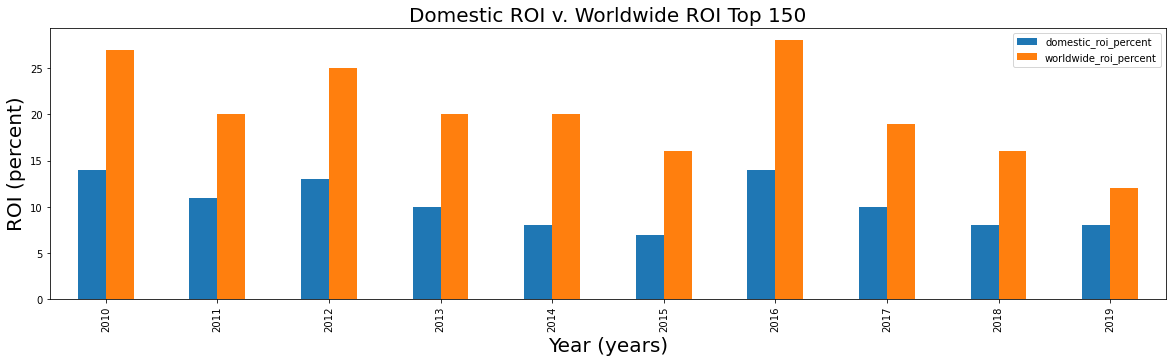

In [109]:
df6.reset_index().plot(
    x="year", y= ["domestic_roi_percent", "worldwide_roi_percent"], kind="bar", figsize  = [20, 5], 
)
plt.title("Domestic ROI v. Worldwide ROI Top 150",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("ROI (percent)", fontsize = 20,)

## How long should the movies be? 

In [110]:
x = df5['runtime_minutes'].mean()
print('The average movie time is ' + 'x')

The average movie time is x


In [111]:
df5

,runtime_minutes,production_budget,domestic_gross_profit,worldwide_gross_profit,domestic_roi_percent,worldwide_roi_percent,year
start_year,,,,,,,
2010,101.528926,3.575972e+07,8.712087e+06,6.812783e+07,2.0,4.0,2010
2011,101.950617,3.833374e+07,6.379640e+06,7.278201e+07,2.0,3.0,2011
2012,101.479452,4.110708e+07,8.806601e+06,8.225039e+07,2.0,4.0,2012
2013,104.379913,4.076439e+07,6.349458e+06,7.435123e+07,2.0,3.0,2013
2014,102.791165,3.783038e+07,1.111810e+07,8.430037e+07,1.0,3.0,2014
2015,100.165323,3.377672e+07,7.842309e+06,6.757454e+07,1.0,3.0,2015
2016,103.296137,4.042475e+07,1.376277e+07,9.020499e+07,2.0,5.0,2016
2017,99.243094,4.956400e+07,8.153353e+06,1.027877e+08,2.0,4.0,2017
2018,104.530488,4.550791e+07,2.081341e+07,1.178528e+08,2.0,4.0,2018


(0.0, 150.0)

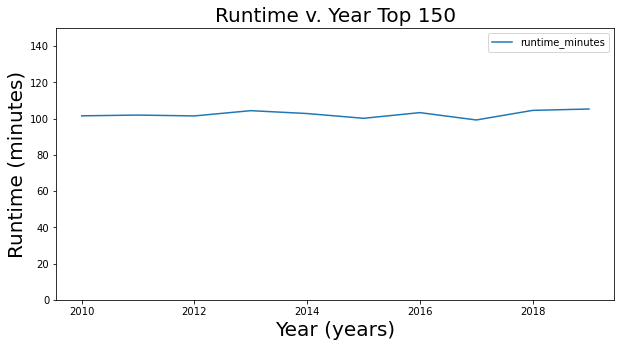

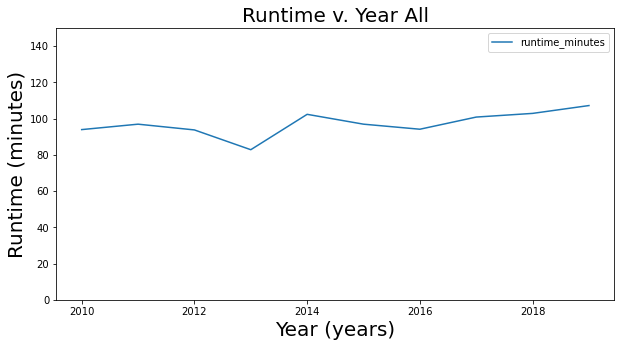

In [138]:
ax1 = df5.plot.line(x='year',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Year Top 150",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)
plt.ylim([0, 150])

ax2 = df6.plot.line(x='year',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Year All",  fontsize = 20)
plt.xlabel("Year (years)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)

plt.ylim([0, 150])

In [139]:
df44 = df4.tail(150)

Text(0, 0.5, 'Runtime (minutes)')

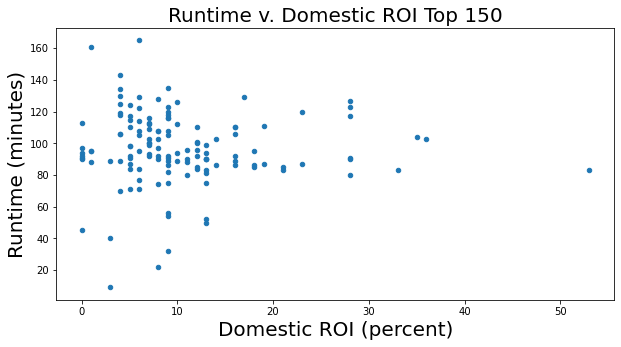

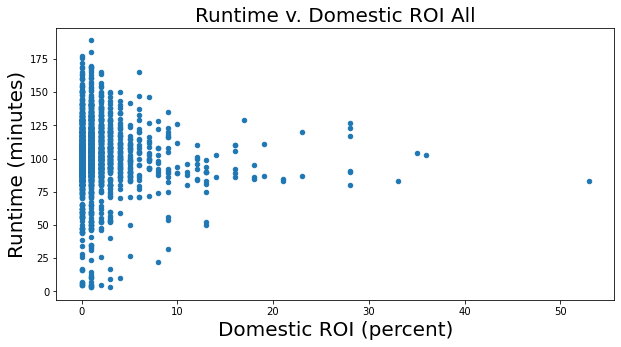

In [142]:
ax3 = df44.plot.scatter(x='domestic_roi_percent',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Domestic ROI Top 150",  fontsize = 20)
plt.xlabel("Domestic ROI (percent)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)

ax3 = df4.plot.scatter(x='domestic_roi_percent',
                      y='runtime_minutes', figsize  = [10, 5])
plt.title("Runtime v. Domestic ROI All",  fontsize = 20)
plt.xlabel("Domestic ROI (percent)", fontsize = 20)
plt.ylabel("Runtime (minutes)", fontsize = 20)

In [122]:
df4['runtime_minutes'].mean()

102.21029626032055

In [127]:
x=0
y=0
for i in list(df4['runtime_minutes'] < 102):
    if i == True:
        x=x+1
    else:
        y=y+1
        
print(x,y)

995 1229
